# How the Polls Moved During the 2016 Election

### Contains
- Major Events
- The Debates
- FBI Investigation
- World Events
- Rallies for Both Canidates

##### For all events except Rallies, any event date that didnt have data it was moved to the next date (labeled AFTER)<br>                                                 Because Rallies were so frequent only 1 per day is listed, and if there was no data for the date it was left out of the graph<br><br>Source: http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton

      

In [26]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division
from datetime import datetime

# use to get info from web
import requests

# stringIO to work with csv
from StringIO import StringIO

In [27]:
# getting the data
url = 'http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text
poll_data = StringIO(source)

In [28]:
# creating the dataframe
poll_df = pd.read_csv(poll_data)

In [30]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


#### Now we see there are 1522 Polls

In [31]:
# previewing the data
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [32]:
# averaging the data
avg = pd.DataFrame(poll_df.mean())

#droping the info we dont need
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)

In [33]:
# getting the standard deviation
std = pd.DataFrame(poll_df.std())

#dropping the same columns we dont need
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)

In [34]:
# combining them into a dataframe
poll_avg = pd.concat([avg,std],axis=1)

#adding header
poll_avg.columns = ['Average','STD']

In [35]:
# viewing the average and standard deviation
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [36]:
# Adding a difference column to show the difference between clinton/trump in every poll
# A POSITIVE value = Leaning Clinton a NEGITIVE value = Leaning Trump
poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

In [37]:
# grouping all the polls by day and averaging all the data
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


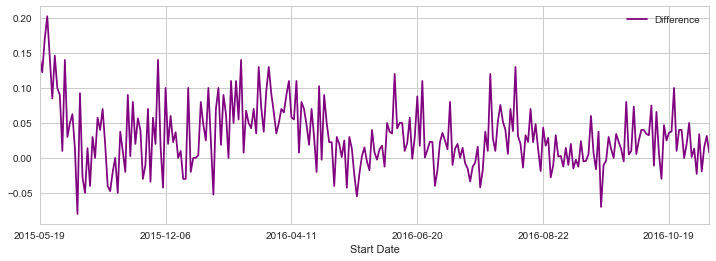

In [38]:
# previewing the difference throughout the election
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='',linestyle='-',color='purple')

#### Now that we have an idea of how the polls moved lets start marking some key events that occured

<hr>
## Debates

#### Lets start by looking at the 3 debates
- Sept. 26, 2016 - 1st debate
- Oct. 9, 2016 - 2nd debate
- Oct. 19, 2016 - 3rd debate

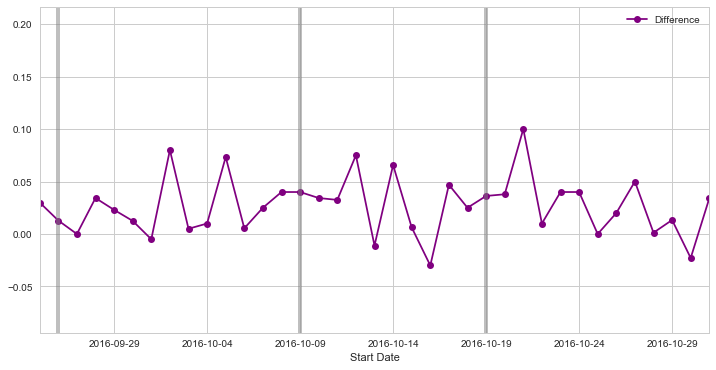

In [39]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(226,262))

#sept 26 1st debate
plt.axvline(x=225+2,linewidth=4,color='grey', alpha=0.5)
#oct 9th 2nd debate
plt.axvline(x=232+8,linewidth=4,color='grey', alpha=0.5)
#oct 19th 3rd debate
plt.axvline(x=232+18,linewidth=4,color='grey', alpha=0.5)

#### Keeping in mind events may not effect polls untill the following few days depending on what time the event happened and what time the poll was done the 3rd debate looks like it may have boosted Clinton 2 days later, but maybe that was something else lets look at some more events

<hr>
## Major Election Events By Month

#### Blue = Hillary Event | Red = Trump Event | Grey = Both<br> For this section if there wasn't a poll on a important date, the following day is marked instead

### July 2016
- July 5, 2016 - FBI Announces Its Not Recommending Criminal Charges Against Clinton
- July 12, 2016 - Sanders Endorses Clinton for President
- July 16, 2016 - Trump Officially Introduces Mike Pence as His Running Mate
- July 21, 2016 - Trump Accepts Republican Nomination
- July 22, 2016 - Clinton Chooses Tim Kaine for Her Running Mate
- July 29, 2016 - Day AFTER Clinton Makes History Accepting Democratic Nomination

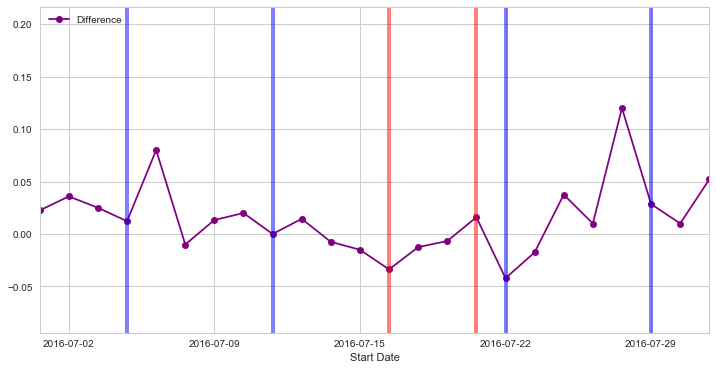

In [40]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(159,182))

plt.axvline(x=162,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=171,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=174,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=175,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='blue', alpha=0.5)

### August 2016
- Aug. 10, 2016 - Newly Released Emails Highlight Clinton Foundation’s Ties to State Department
- Aug. 17, 2016 - Donald Trump hands Kellyanne Conway, Stephen Bannon new roles in campaign


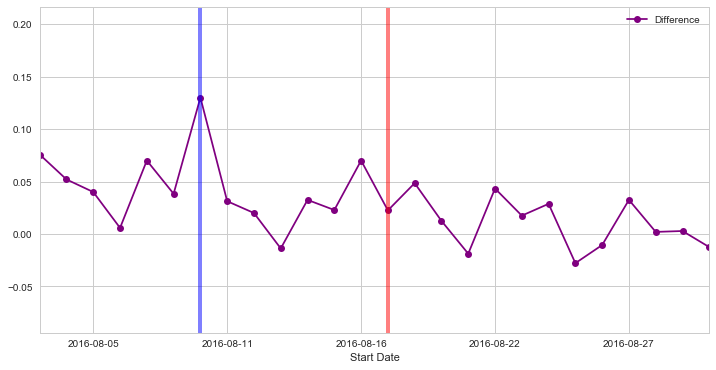

In [41]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(183,208))

plt.axvline(x=189,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=196,linewidth=4,color='red', alpha=0.5)

### September 2016
- Sept. 10, 2016 - ‘Basket of Deplorables’ comment from Clinton
- Sept. 11, 2016 - Clinton ‘Overheats’ at 9/11 Memorial, Campaign Reveals Clinton Has Pneumonia
- Sept. 18, 2016 - Both Canidates react to New York Bombing
- Sept. 26, 2016 - The First Presidential Debate

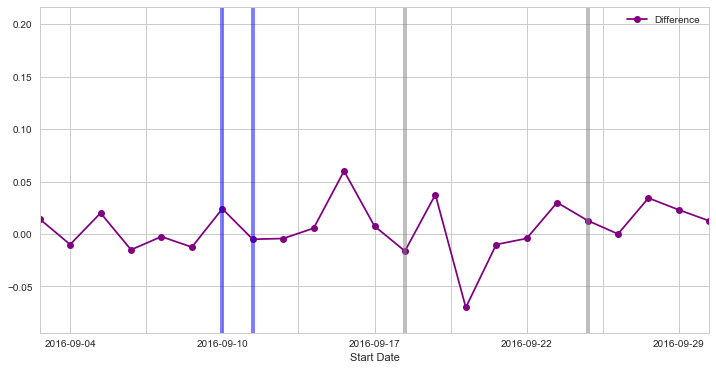

In [42]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(209,231))

plt.axvline(x=215,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=216,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=221,linewidth=4,color='grey', alpha=0.5)
plt.axvline(x=227,linewidth=4,color='grey', alpha=0.5)

### October 2016
- Oct. 7, 2016 - WikiLeaks Release Thousands of Clinton Campaign Chair’s Emails
- Oct. 7, 2016 - Trump Is Heard Making Lewd Comments About Women in 2005 Video
- Oct. 9, 2016 - The Second Presidential Debate
- Oct. 12, 2016 - Women Accuse Trump of Inappropriately touching them
- Oct. 19, 2016 - The Final Presidential Debate
- Oct. 28, 2016 - The FBI Reviews New Emails Tied to Clinton Private Email Server Investigation

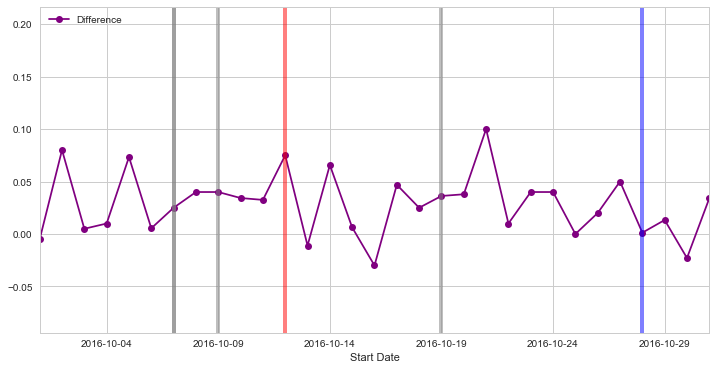

In [43]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(232,262))

plt.axvline(x=238,linewidth=4,color='grey', alpha=0.5)
plt.axvline(x=238,linewidth=4,color='grey', alpha=0.5)
plt.axvline(x=240,linewidth=4,color='grey', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=250,linewidth=4,color='grey', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='blue', alpha=0.5)

#### Now lets look at the FBI announcing there investigation into Clinton 11 days before the election

<hr>
##  FBI Clinton Investigation 11 Days Before Election
- Oct. 28th, 2016 - James Comey informs congress they are re opening a probe into Clinton

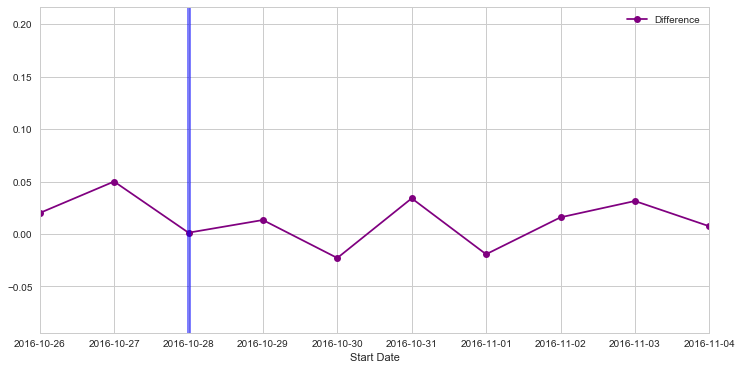

In [44]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(257,266))

plt.axvline(x=232+27,linewidth=4,color='blue', alpha=0.5)

#### Doesn't seem to have had much of an effect, sadly HuffPost Pollster Data stops before the 6th when Comey announced that the new evidence found did not change the agency conclusion that Hillary shouldn't face criminal charges<br><br> Lets move on to World events

<hr>
## Major World Events By Month
#### Orange = Terror Attack | Cyan = World Politics | Green = Other

### June 2016
- June 12, 2016 - Orlando Nightclub Terror Attack
- June 23, 2016 - Brexit
- June 28, 2016 - Istanbul Turkey Airport Terror Attack

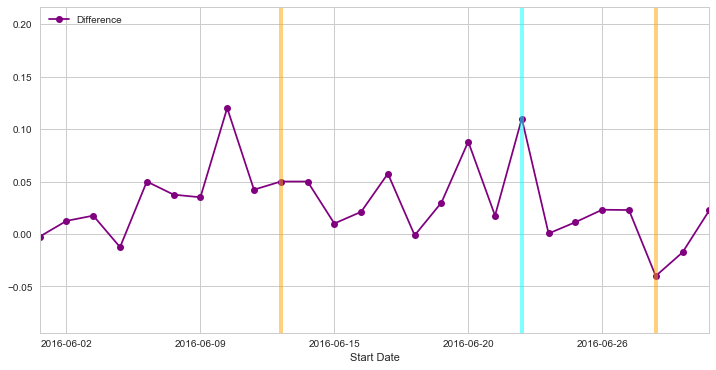

In [46]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(134,159))

plt.axvline(x=143,linewidth=4,color='orange', alpha=0.5)
plt.axvline(x=152,linewidth=4,color='cyan', alpha=0.5)
plt.axvline(x=157,linewidth=4,color='orange', alpha=0.5)

### July 2016
- July 14, 2016 - France Nice Terror Attack
- July 15 2016 - Turkey Coup Attempt

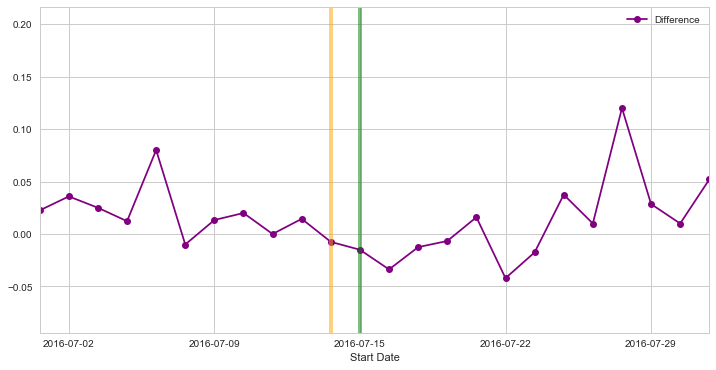

In [47]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(159,182))

plt.axvline(x=169,linewidth=4,color='orange', alpha=0.5)
plt.axvline(x=170,linewidth=4,color='green', alpha=0.5)


### August 2016
- Aug. 5, 2016 - Olympics Start
- Aug. 21, 2016 - Olympics End
- Aug. 25, 2016 - Italy Earthquake

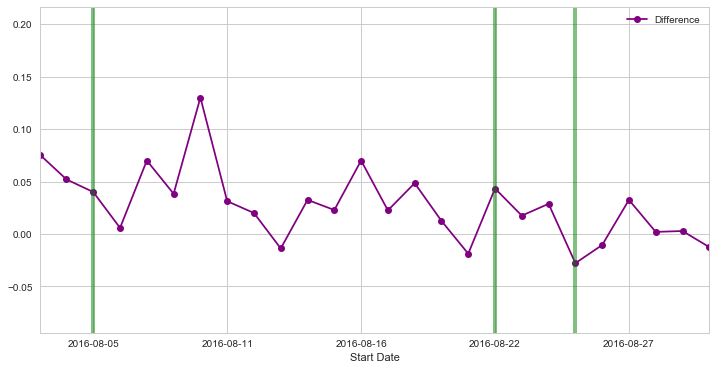

In [48]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(183,208))

plt.axvline(x=185,linewidth=4,color='green', alpha=0.5)
plt.axvline(x=200,linewidth=4,color='green', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='green', alpha=0.5)

#### From skimming headlines I didn't find much for Sept. or Oct. So lets move on to Rallies!

<hr>
## Trump Rallies
#### Dates that are missing poll data were left out<br>Only included rallies with citations | Only includes 1 per day<br><br> Source: https://en.wikipedia.org/wiki/List_of_rallies_for_the_Donald_Trump_presidential_campaign,_2016

### June 2016
- June 1, 2016 - Sacramento, CA
- June 2, 2016 - San Jose, CA
- June 3, 2016 - Sacramento, CA
- June 10, 2016 - Richmond, VA
- June 11, 2016 - Tampa, FL
- June 14, 2016 - Greensboro, NC
- June 15, 2016 - Atlanta, GA
- June 16, 2016 - Dallas, TX
- June 17, 2016 - The Woodlands, TX
- June 18, 2016 - Phoenix, AZ
- June 28, 2016 - St. Clairsville, OH
- June 29, 2016 - Bangor, ME

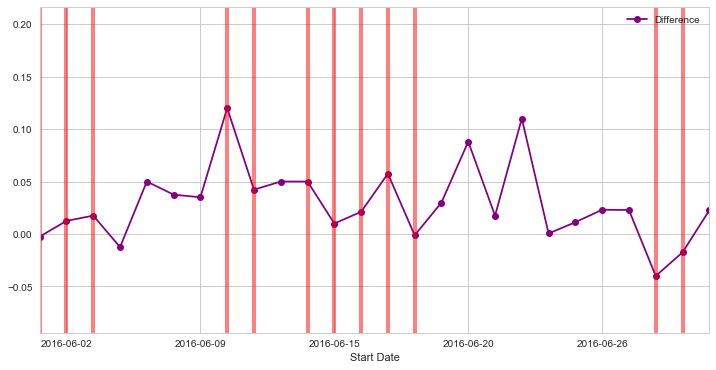

In [49]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(134,159))

plt.axvline(x=134,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=135,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=136,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=141,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=142,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=144,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=145,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=146,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=147,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=148,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=157,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=158,linewidth=4,color='red', alpha=0.5)

### July 2016
- July 5, 2016 - Raleigh, NC
- July 6, 2016 - Cincinnati, OH
- July 12, 2016 - Westfield, IN
- July 25, 2016 - Winston-Salem, NC
- July 27, 2016 - Toledo, OH
- July 29, 2016 - Denver, CO

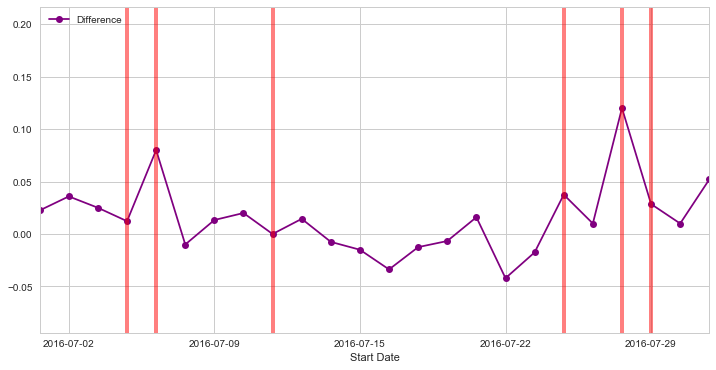

In [50]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(159,182))

plt.axvline(x=162,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=163,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=177,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=179,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='red', alpha=0.5)

### August 2016

- Aug. 1, 2016 - Mechanicsburg, PA
- Aug. 4, 2016 - Portland, ME
- Aug. 5, 2016 - Green Bay, WA
- Aug. 6, 2016 - Windham, NH
- Aug. 9, 2016 - Wilmington, NC
- Aug. 10, 2016 - Sunrise, FL
- Aug. 11, 2016 - Kissimmee, FL
- Aug. 12, 2016 - Erie, PA
- Aug. 13, 2016 - Fairfield, CT
- Aug. 16, 2016 - West Bend, WI
- Aug. 18, 2016 - Charlotte, NC
- Aug. 19, 2016 - Dimondale, MI
- Aug. 20, 2016 - Fredericksburg, VA
- Aug. 22, 2016 - Akron, OH
- Aug. 23, 2016 - Austin, TX
- Aug. 24, 2016 - Jackson, MS
- Aug. 25, 2016 - Manchester, NH
- Aug. 31, 2016 - Phoenix, AZ

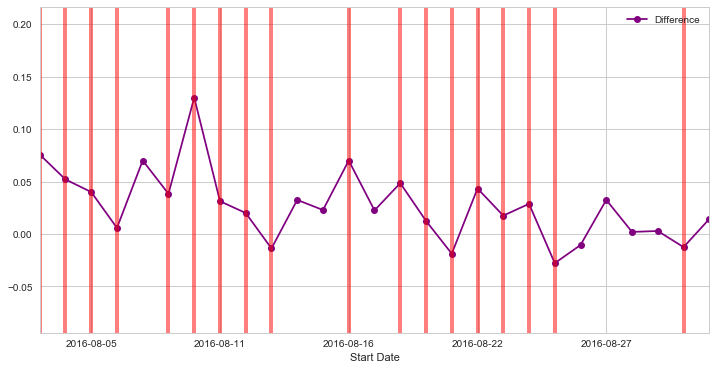

In [51]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(183,209))

plt.axvline(x=183,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=184,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=185,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=186,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=188,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=189,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=190,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=191,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=192,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=195,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=197,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=198,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=199,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=200,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=201,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=202,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=208,linewidth=4,color='red', alpha=0.5)

### September 2016
- Sept. 1, 2016 - Wilmington, OH
- Sept. 6, 2016 - Greenville, NC
- Sept. 9, 2016 - Pensacola, FL
- Sept. 12, 2016 - Asheville, NC
- Sept. 15, 2016 - Laconia, NH
- Sept. 16, 2016 - Miami, FL
- Sept. 17, 2016 - Colorado Springs, CO
- Sept. 19, 2016 - Estero, FL
- Sept. 20, 2016 - Kenansville, NC
- Sept. 21, 2016 - Toledo, OH
- Sept. 22, 2016 - Chester Township, PA
- Sept. 27, 2016 - Melbourne, FL
- Sept. 28, 2016 - Waukesha, WI
- Sept. 29, 2016 - Bedford, NH
- Sept. 30, 2016 - Novi, MI

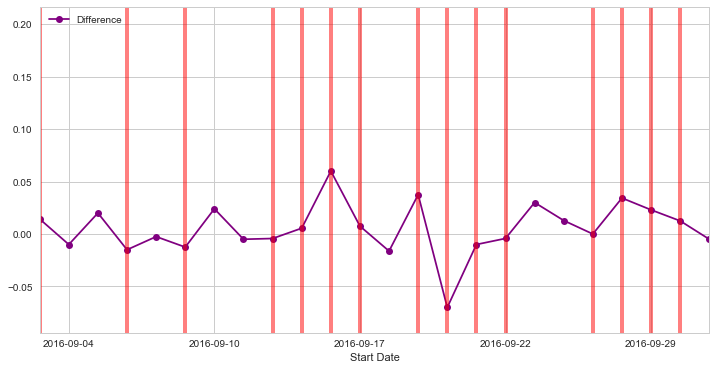

In [52]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(209,232))

plt.axvline(x=209,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=212,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=214,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=217,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=218,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=219,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=220,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=222,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=223,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=224,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=225,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=228,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=229,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=230,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=231,linewidth=4,color='red', alpha=0.5)

### October 2016
- Oct. 1, 2016 -  Manheim, PA
- Oct. 3, 2016 -  Loveland, CO
- Oct. 4, 2016 -  Prescott Valley, AZ
- Oct. 5, 2016 -  Henderson, NV
- Oct. 10, 2016 - Ambridge, PA
- Oct. 11, 2016 - Panama City Beach, FL
- Oct. 12, 2016 - Lakeland, FL
- Oct. 13, 2016 - West Palm Beach, FL
- Oct. 14, 2016 - Charlotte, NC
- Oct. 15, 2016 - Portsmouth, NH
- Oct. 20, 2016 - Delaware, OH
- Oct. 21, 2016 - Newtown Township, PA
- Oct. 22, 2016 - Virginia Beach, VA
- Oct. 25, 2016 - Sanford, FL
- Oct. 26, 2016 - Kinston, NC
- Oct. 27, 2016 - Geneva, OH
- Oct. 28, 2016 - Cedar Rapids, IA
- Oct. 29, 2016 - Phoenix, AZ
- Oct. 30, 2016 - Albuquerque, NM
- Oct. 31, 2016 - Warren, MI

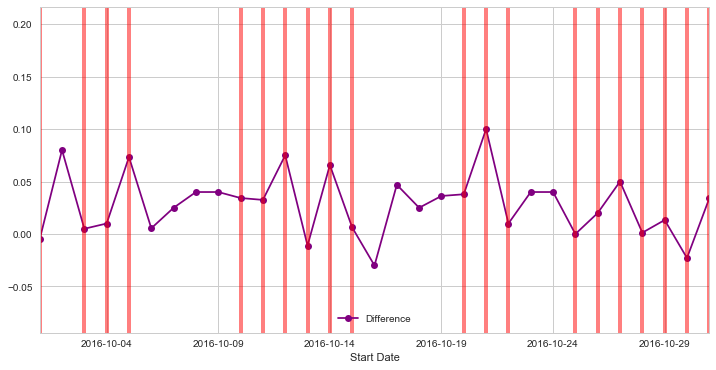

In [55]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(232,262))

plt.axvline(x=232,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=234,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=235,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=236,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=241,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=242,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=244,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=245,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=246,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=251,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=252,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=253,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=256,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=257,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=258,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=260,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=261,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=262,linewidth=4,color='red', alpha=0.5)

### All Trump Rallies

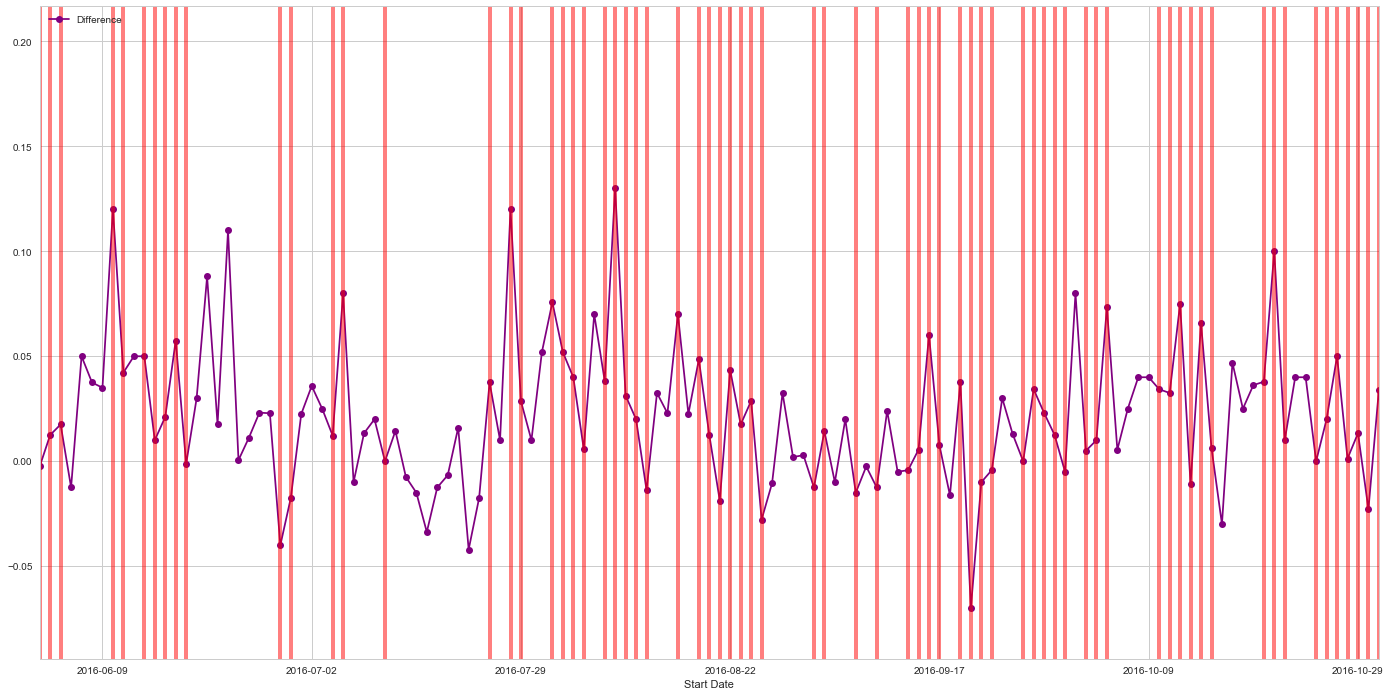

In [63]:
poll_df.plot('Start Date','Difference',figsize=(24,12),marker='o',linestyle='-',color='purple',xlim=(134,262))

plt.axvline(x=134,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=135,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=136,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=141,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=142,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=144,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=145,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=146,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=147,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=148,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=157,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=158,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=162,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=163,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=177,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=179,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=183,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=184,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=185,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=186,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=188,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=189,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=190,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=191,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=192,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=195,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=197,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=198,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=199,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=200,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=201,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=202,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=208,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=209,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=212,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=214,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=217,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=218,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=219,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=220,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=222,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=223,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=224,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=225,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=228,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=229,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=230,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=231,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=232,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=234,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=235,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=236,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=241,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=242,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=244,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=245,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=246,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=251,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=252,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=253,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=256,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=257,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=258,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=260,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=261,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=262,linewidth=4,color='red', alpha=0.5)

***
## Clinton Rallies

#### Source: https://hillaryspeeches.com/scheduled-events/

### June 2016
- June 1, 2016 - Newark, NJ
- June 2, 2016 - El Centro, CA
- June 4, 2016 - Fresno, CA
- June 5, 2016 - Sacramento, CA
- June 6, 2016 - Lynwood, CA
- June 14, 2016 - Pittsburgh, PA
- June 21, 2016 - Columbus, OH
- June 27, 2016 - Cincinnati, OH

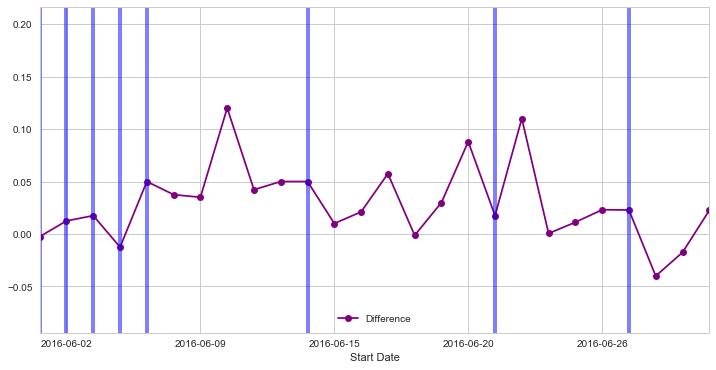

In [64]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(134,159))

plt.axvline(x=134,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=135,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=136,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=137,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=138,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=144,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=151,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=156,linewidth=4,color='blue', alpha=0.5)

### July 2016
- July 5, 2016 - Charlotte, NC
- July 12, 2016 - Portsmouth, NH
- July 13, 2016 - Springfield, IL
- July 14, 2016 - Annandale, VA
- July 18, 2016 - Cincinnati, OH
- July 22, 2016 - Tampa, FL
- July 23, 2016 - Miami, FL
- July 29, 2016 - Harrisburg, PA
- July 30, 2016 - Youngstown, OH
- July 31, 2016 - Columbus, OH

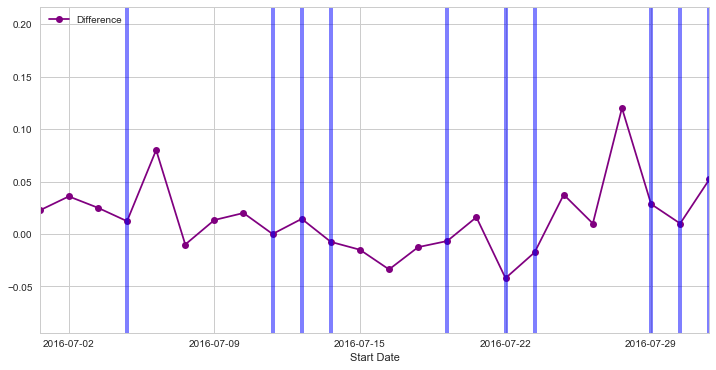

In [65]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(159,182))

plt.axvline(x=162,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=168,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=169,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=173,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=175,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=176,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=181,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=182,linewidth=4,color='blue', alpha=0.5)


### August 2016

- Aug. 1, 2016 - Omaha, NE
- Aug. 4, 2016 - Las Vegas, NV
- Aug. 8, 2016 - St. Petersburg, FL
- Aug. 10, 2016 - Des Moines, IA
- Aug. 15, 2016 - Scranton, PA
- Aug. 16, 2016 - Philadelphia, PA
- Aug. 17, 2016 - Cleveland, OH
- Aug. 25, 2016 - Reno, NV

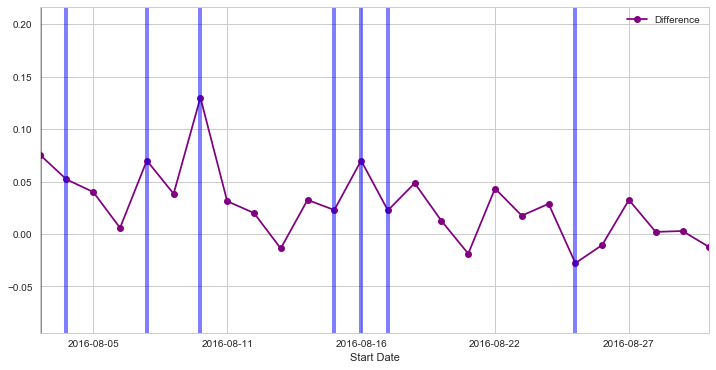

In [66]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(183,208))

plt.axvline(x=183,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=184,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=187,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=189,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=194,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=195,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=196,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='blue', alpha=0.5)

### September 2016
- Sept. 5, 2016 - Cleveland, OH
- Sept. 6, 2016 - Tampa, FL
- Sept. 8, 2016 - Charlotte, NC
- Sept. 15, 2016 - Greensboro, NC
- Sept. 19, 2016 - Philadelphia, PA
- Sept. 21, 2016 - Orlando, FL
- Sept. 27, 2016 - Raleigh, NC
- Sept. 28, 2016 - Durham, NH
- Sept. 30, 2016 - Fort Pierce, FL

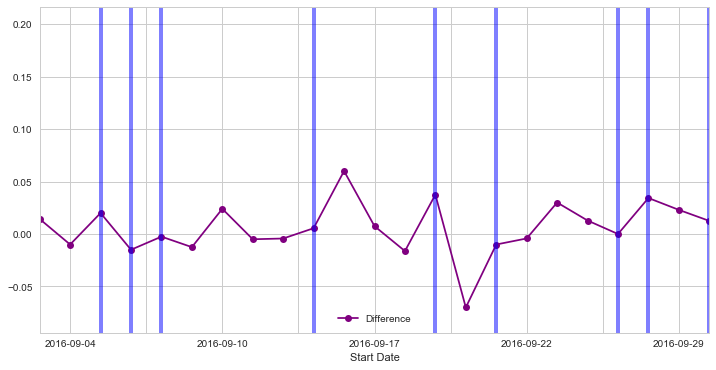

In [67]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(209,231))

plt.axvline(x=211,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=212,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=213,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=218,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=222,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=224,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=228,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=229,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=231,linewidth=4,color='blue', alpha=0.5)

### October 2016
- Oct. 3, 2016 -  Toledo, OH
- Oct. 4, 2016 -  Harrisburg, PA
- Oct. 10, 2016 -  Columbus, OH
- Oct. 11, 2016 -  Miami, FL
- Oct. 12, 2016 -  Pueblo, CO
- Oct. 21, 2016 -  Cleveland, OH
- Oct. 22, 2016 -  Philadelphia, PA
- Oct. 23, 2016 -  Raleigh, NC
- Oct. 24, 2016 -  Manchester, NH
- Oct. 25, 2016 -  Coconut Creek, FL
- Oct. 26, 2016 -  Tampa, FL
- Oct. 27, 2016 -  Winston Salem, NC
- Oct. 28, 2016 -  Des Moines, IA
- Oct. 30, 2016 -  Wilton Manors, FL
- Oct. 31, 2016 -  Cincinnati, OH

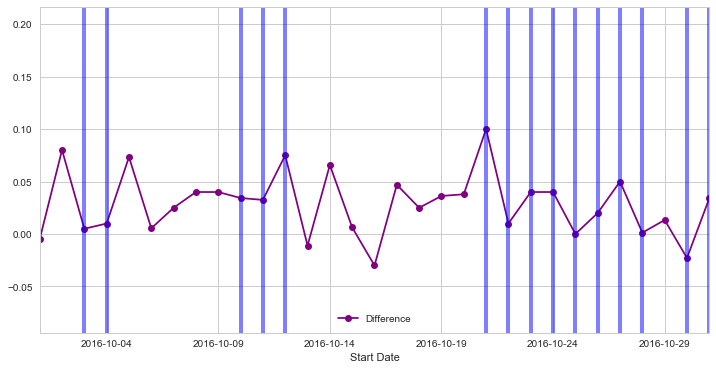

In [68]:
poll_df.plot('Start Date','Difference',figsize=(12,6),marker='o',linestyle='-',color='purple',xlim=(232,262))

plt.axvline(x=234,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=235,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=241,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=242,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=252,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=253,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=254,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=255,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=256,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=257,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=258,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=261,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=262,linewidth=4,color='blue', alpha=0.5)


### All Clinton Rallies

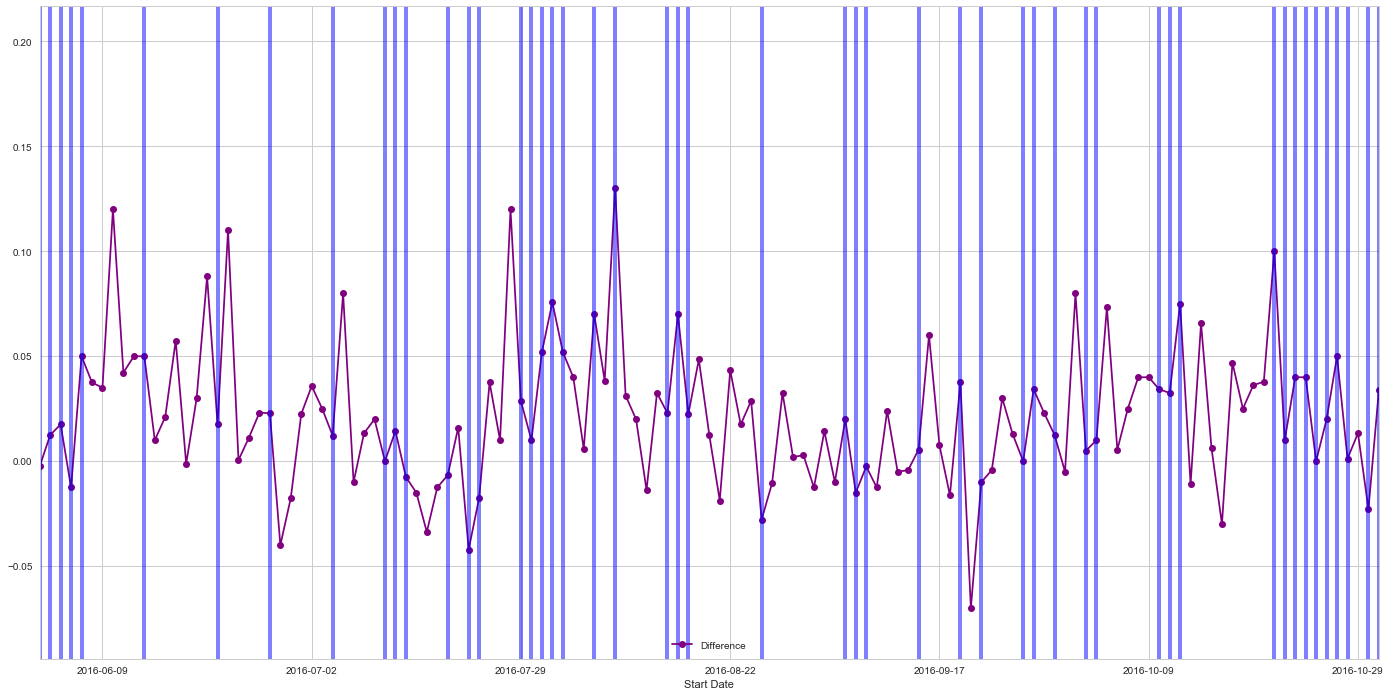

In [71]:
poll_df.plot('Start Date','Difference',figsize=(24,12),marker='o',linestyle='-',color='purple',xlim=(134,262))

plt.axvline(x=134,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=135,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=136,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=137,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=138,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=144,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=151,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=156,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=162,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=168,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=169,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=173,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=175,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=176,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=181,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=182,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=183,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=184,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=187,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=189,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=194,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=195,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=196,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=211,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=212,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=213,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=218,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=222,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=224,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=228,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=229,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=231,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=234,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=235,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=241,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=242,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=252,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=253,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=254,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=255,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=256,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=257,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=258,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=261,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=262,linewidth=4,color='blue', alpha=0.5)

## Trump vs. Clinton Rallies
#### Trump = Red | Clinton = Blue | Purple = Both

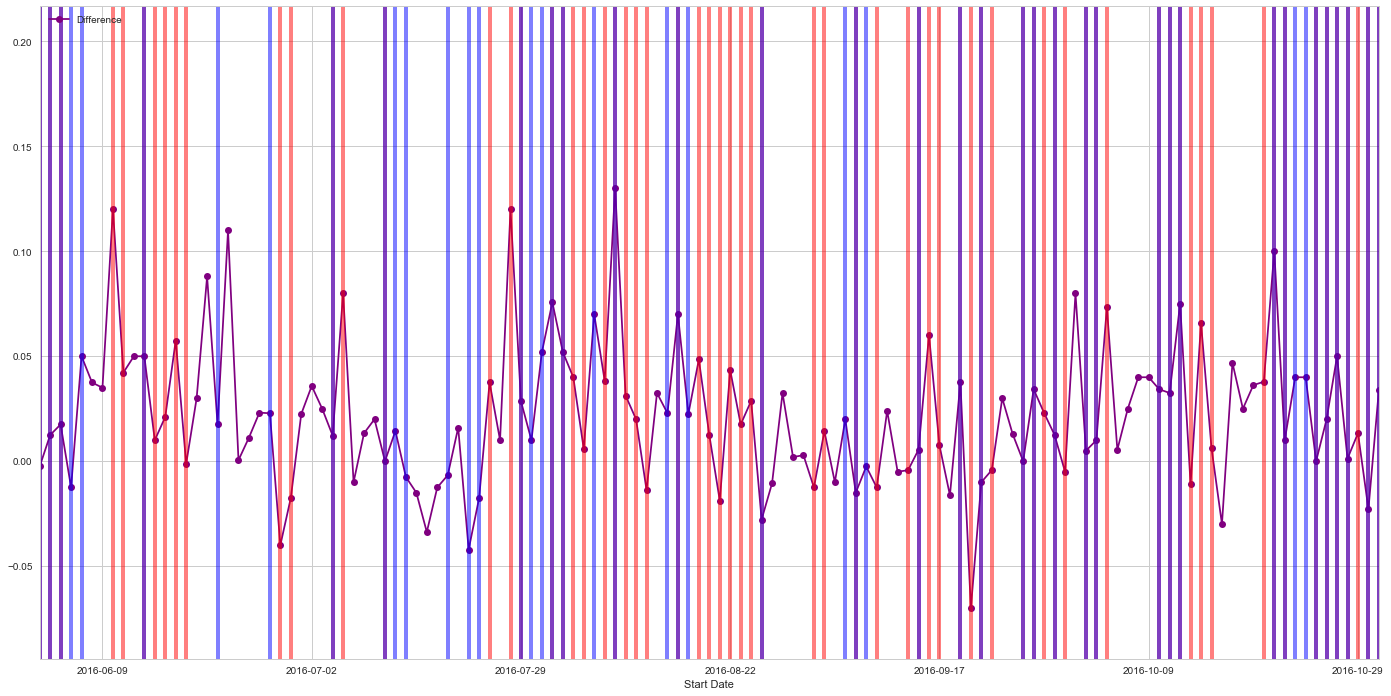

In [72]:
poll_df.plot('Start Date','Difference',figsize=(24,12),marker='o',linestyle='-',color='purple',xlim=(134,262))

plt.axvline(x=134,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=135,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=136,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=141,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=142,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=144,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=145,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=146,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=147,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=148,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=157,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=158,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=162,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=163,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=177,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=179,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=183,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=184,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=185,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=186,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=188,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=189,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=190,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=191,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=192,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=195,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=197,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=198,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=199,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=200,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=201,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=202,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=208,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=209,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=212,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=214,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=217,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=218,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=219,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=220,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=222,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=223,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=224,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=225,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=228,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=229,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=230,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=231,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=232,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=234,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=235,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=236,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=241,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=242,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=244,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=245,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=246,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=251,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=252,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=253,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=256,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=257,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=258,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=260,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=261,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=262,linewidth=4,color='red', alpha=0.5)
plt.axvline(x=134,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=135,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=136,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=137,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=138,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=144,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=151,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=156,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=162,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=167,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=168,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=169,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=173,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=175,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=176,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=180,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=181,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=182,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=183,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=184,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=187,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=189,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=194,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=195,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=196,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=203,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=211,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=212,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=213,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=218,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=222,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=224,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=228,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=229,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=231,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=234,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=235,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=241,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=242,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=243,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=252,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=253,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=254,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=255,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=256,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=257,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=258,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=259,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=261,linewidth=4,color='blue', alpha=0.5)
plt.axvline(x=262,linewidth=4,color='blue', alpha=0.5)